In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [71]:
df_train=pd.read_csv('C:/Users/hp/desktop/prodigy/housing/train.csv')

In [72]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [73]:
df_train.shape

(1460, 81)

In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
df_train.duplicated().sum()

0

In [76]:
df_train.isnull().sum().sort_values(ascending=False)/df_train.index.size
# Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size.head(10)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

In [77]:
num_col=df_train.select_dtypes(exclude='object')
cat_col=df_train.select_dtypes(include='object')

In [78]:
num_col.isnull().sum().sort_values(ascending=False)/num_col.index.size
#Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

LotFrontage      0.177397
GarageYrBlt      0.055479
MasVnrArea       0.005479
Id               0.000000
OpenPorchSF      0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
EnclosedPorch    0.000000
HalfBath         0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
BedroomAbvGr     0.000000
FullBath         0.000000
MSSubClass       0.000000
BsmtFinSF2       0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
BsmtFinSF1       0.000000
BsmtUnfSF        0.000000
BsmtHalfBath     0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
SalePrice        0.000000
dtype: float

In [79]:
num_col.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [80]:
num_col.LotFrontage=num_col.LotFrontage.fillna(num_col.LotFrontage.median())

In [81]:
num_col.LotFrontage.isnull().sum()

0

In [82]:
num_col.GarageYrBlt=num_col.GarageYrBlt.fillna(num_col.GarageYrBlt.median())

In [83]:
num_col.GarageYrBlt.isnull().sum()

0

In [84]:
num_col.MasVnrArea=num_col.MasVnrArea.fillna(num_col.MasVnrArea.median())

In [85]:
num_col.isnull().sum().sort_values(ascending=False)/num_col.index.size

Id               0.0
WoodDeckSF       0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
OpenPorchSF      0.0
MSSubClass       0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
SalePrice        0.0
dtype: float64

In [86]:
num_col.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [87]:
cat_col.isnull().sum().sort_values(ascending=False)/cat_col.index.size

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
GarageType       0.055479
GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
BsmtFinType2     0.026027
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtQual         0.025342
BsmtCond         0.025342
MasVnrType       0.005479
Electrical       0.000685
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
PavedDrive       0.000000
SaleType         0.000000
MSZoning         0.000000
Street           0.000000
Condition2       0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
BldgType         0.000000
Foundation       0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st 

In [88]:
# Dropping columns with more than 30% missing values

In [89]:
cat_col=cat_col.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [163]:
cat_col.shape

(1460, 38)

In [90]:
cat_col.isnull().sum().sort_values(ascending=False)/cat_col.index.size

GarageCond       0.055479
GarageQual       0.055479
GarageFinish     0.055479
GarageType       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtCond         0.025342
BsmtFinType1     0.025342
BsmtQual         0.025342
MasVnrType       0.005479
Electrical       0.000685
Heating          0.000000
MSZoning         0.000000
HeatingQC        0.000000
CentralAir       0.000000
Functional       0.000000
PavedDrive       0.000000
SaleType         0.000000
KitchenQual      0.000000
Foundation       0.000000
Street           0.000000
ExterCond        0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
SaleCondition    0.000000
dtype: float

In [91]:
for i in cat_col.columns:
    print(i.upper(), cat_col[i].nunique())
    print(cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('')

MSZONING 5
['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

STREET 2
['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64

LOTSHAPE 4
['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LANDCONTOUR 4
['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

UTILITIES 2
['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LOTCONFIG 5
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LANDSLOPE 3
['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NEIGHBORHOOD 25
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timb

In [92]:
for i in range(1,38):
    a=cat_col.columns[i]
    cat_col[a]=cat_col[a].fillna(cat_col[a].mode()[0])

In [93]:
cat_col.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [94]:
# OUtliers Treatment

In [95]:
num_col.shape

(1460, 38)

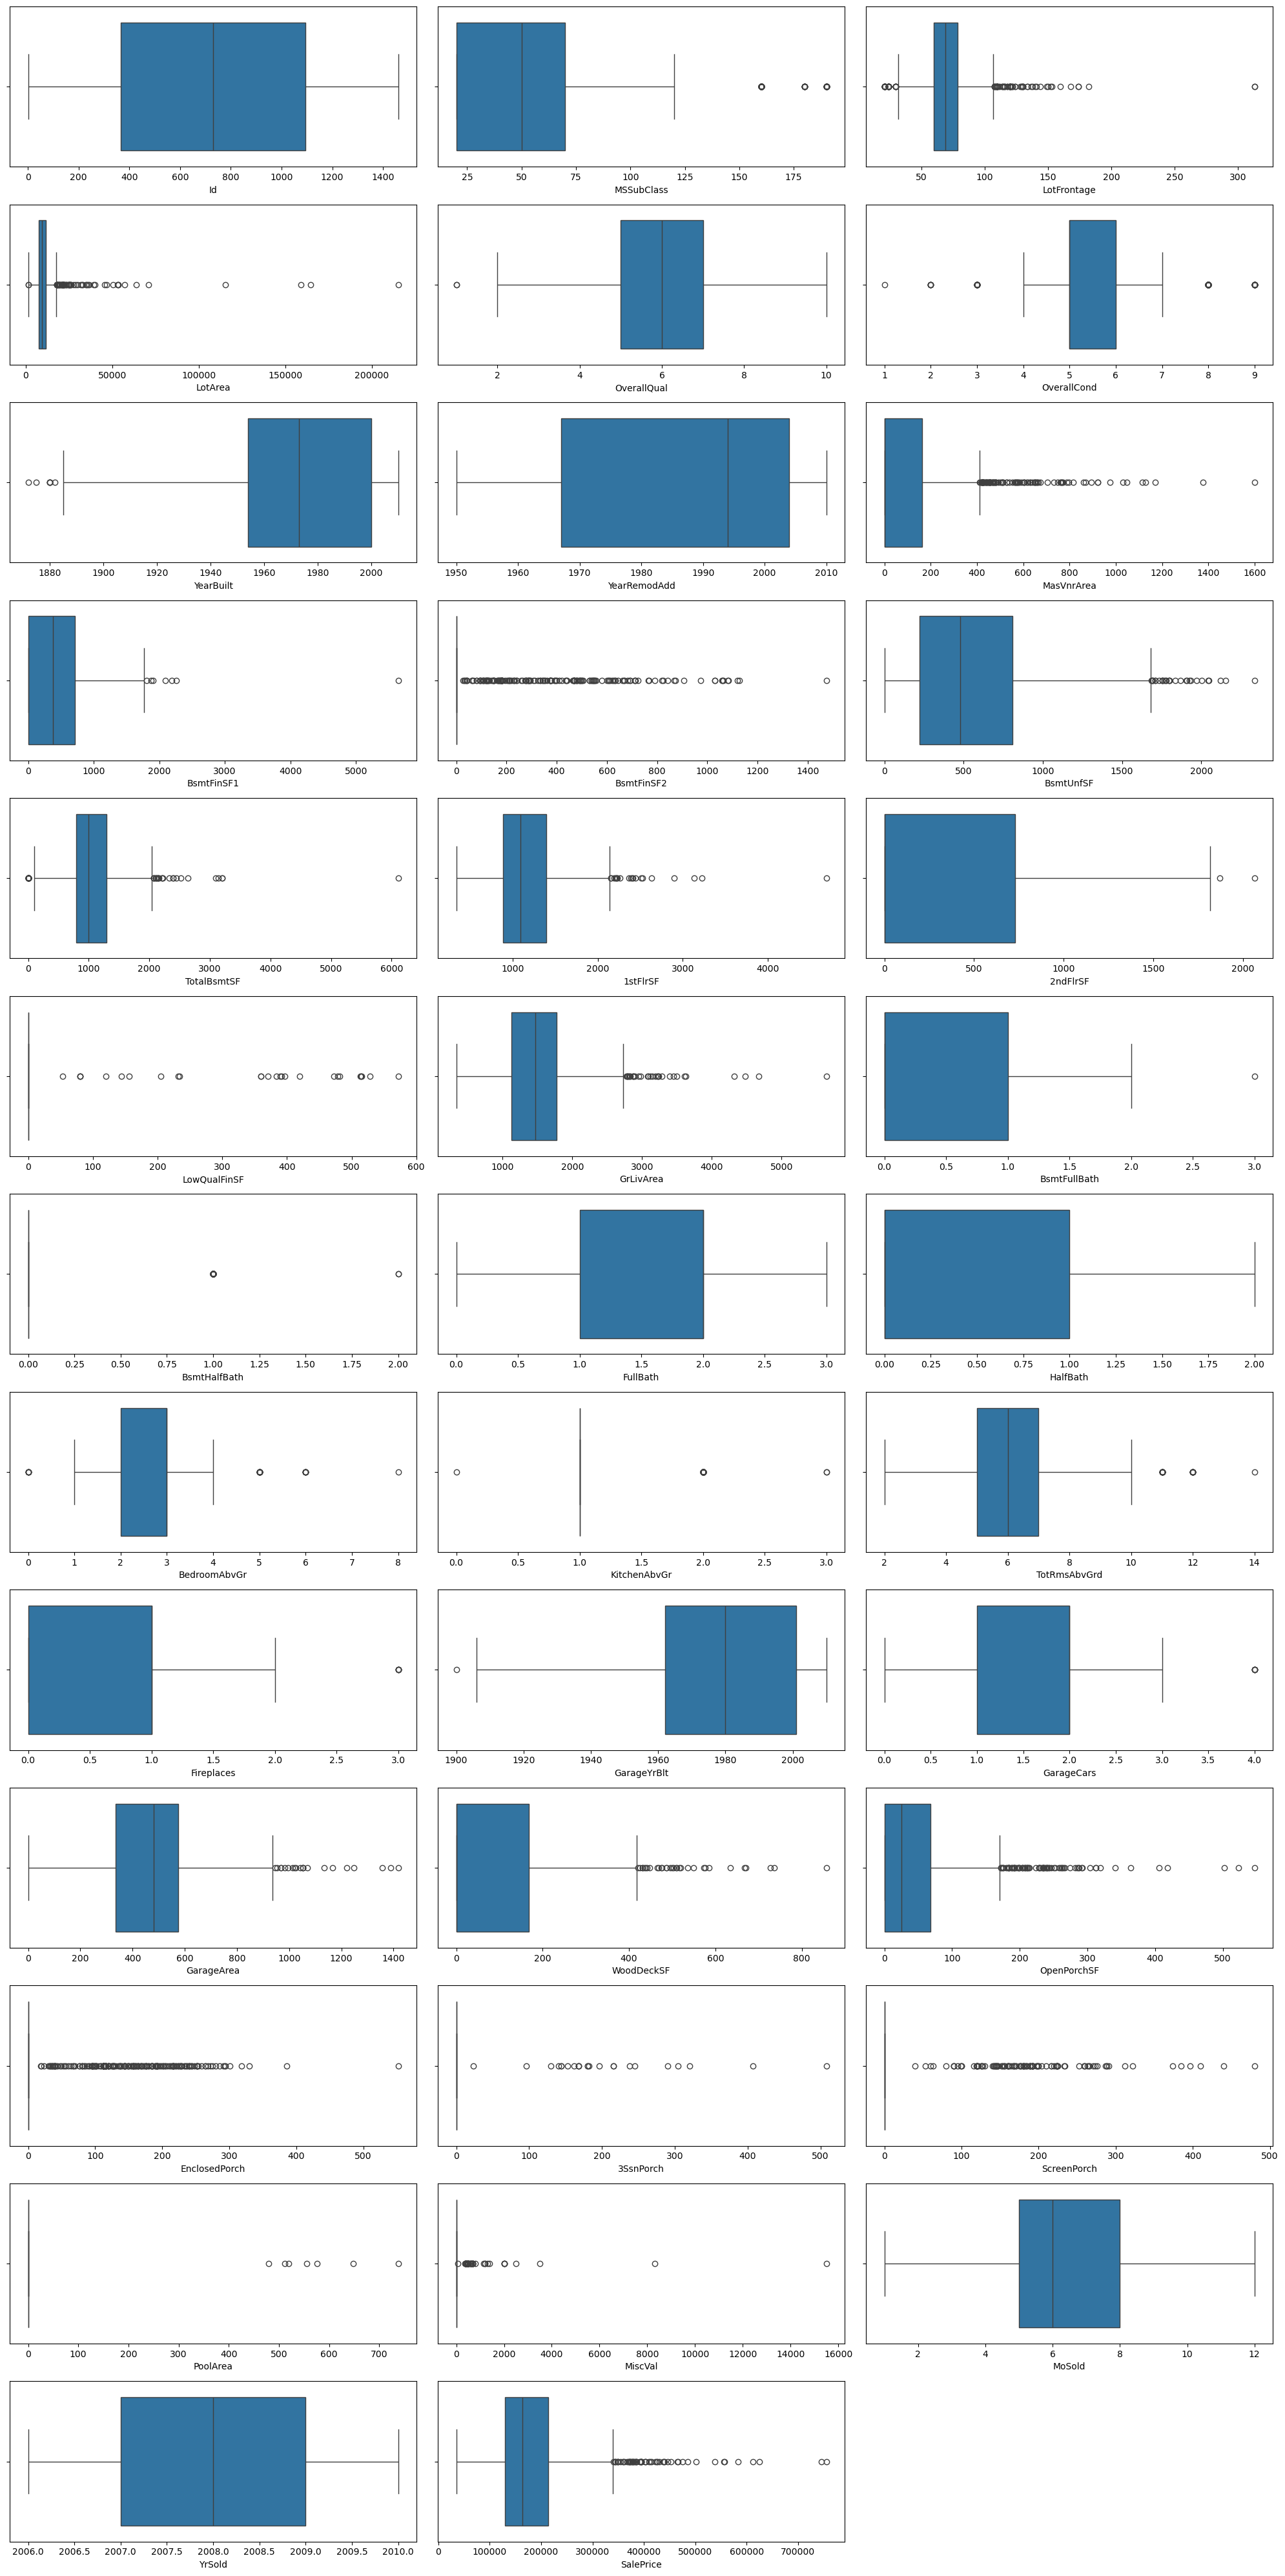

In [96]:
plt.figure(figsize=(20,40))
for i in range(len(num_col.columns)):
    plt.subplot(13,3,i+1)
    sns.boxplot(data=num_col,x=num_col.columns[i])
    plt.tight_layout()

In [97]:
def remove_outliers(col):
    q5,q1,q3,q95=np.nanpercentile(col,[5,25,75,95])
    IQR=q3-q1
    ul=q3+(1.5*IQR)
    ll=q1-(1.5*IQR)
    return(q5,q95,ul,ll)

In [98]:
for i in num_col.columns:
    q5,q95,ul,ll=remove_outliers(num_col[i])
    print('Lower Fence and Upper Fence of {}'.format(i),' = ',round(ll,3),'&', round(ul,3))
    print('5 percent and 95 percent Fence of {}'.format(i),' = ',round(q5,3),'&', round(q95,3))
    print('Min & Max {}'.format(i),'=',round(num_col[i].min(),3),'&',round(num_col[i].max(),3))
    print('')

Lower Fence and Upper Fence of Id  =  -728.5 & 2189.5
5 percent and 95 percent Fence of Id  =  73.95 & 1387.05
Min & Max Id = 1 & 1460

Lower Fence and Upper Fence of MSSubClass  =  -55.0 & 145.0
5 percent and 95 percent Fence of MSSubClass  =  20.0 & 160.0
Min & Max MSSubClass = 20 & 190

Lower Fence and Upper Fence of LotFrontage  =  31.5 & 107.5
5 percent and 95 percent Fence of LotFrontage  =  35.95 & 104.0
Min & Max LotFrontage = 21.0 & 313.0

Lower Fence and Upper Fence of LotArea  =  1481.5 & 17673.5
5 percent and 95 percent Fence of LotArea  =  3311.7 & 17401.15
Min & Max LotArea = 1300 & 215245

Lower Fence and Upper Fence of OverallQual  =  2.0 & 10.0
5 percent and 95 percent Fence of OverallQual  =  4.0 & 8.0
Min & Max OverallQual = 1 & 10

Lower Fence and Upper Fence of OverallCond  =  3.5 & 7.5
5 percent and 95 percent Fence of OverallCond  =  4.0 & 8.0
Min & Max OverallCond = 1 & 9

Lower Fence and Upper Fence of YearBuilt  =  1885.0 & 2069.0
5 percent and 95 percent Fenc

In [99]:
num_col[num_col.SalePrice > 340037]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
11,12,60,85.0,11924,9,5,2005,2006,286.0,998,...,147,21,0,0,0,0,0,7,2006,345000
53,54,20,68.0,50271,9,5,1981,1987,0.0,1810,...,857,72,0,0,0,0,0,11,2006,385000
58,59,60,66.0,13682,10,5,2006,2006,1031.0,0,...,192,0,37,0,0,0,0,10,2006,438780
112,113,60,77.0,9965,7,5,2007,2007,220.0,984,...,120,184,0,0,168,0,0,10,2007,383970
151,152,20,107.0,13891,8,5,2007,2008,436.0,1400,...,0,102,0,0,0,0,0,1,2008,372402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1269,50,69.0,14100,8,9,1935,1997,632.0,192,...,314,12,0,0,0,0,0,5,2008,381000
1353,1354,50,56.0,14720,8,5,1995,1996,579.0,816,...,283,86,0,0,0,0,0,3,2010,410000
1373,1374,20,69.0,11400,10,5,2001,2002,705.0,1282,...,314,140,0,0,0,0,0,3,2007,466500
1388,1389,20,42.0,14892,9,5,2006,2007,160.0,1320,...,201,39,0,0,0,0,0,10,2009,377500


<Axes: ylabel='SalePrice'>

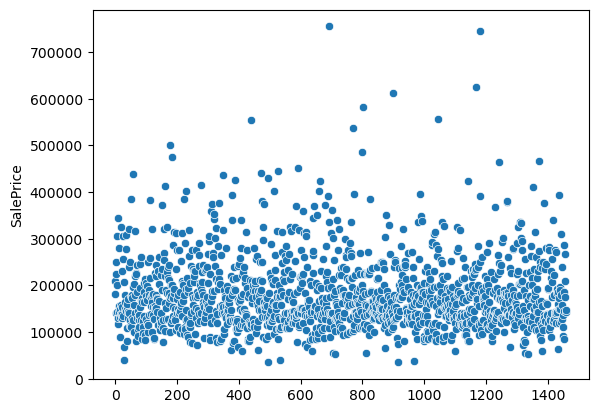

In [39]:
sns.scatterplot(num_col.SalePrice)

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
cat_col1=cat_col.copy()

In [102]:
encoder=LabelEncoder()

In [103]:
for i in cat_col1.columns:
    cat_col1[i]=encoder.fit_transform(cat_col1[i])

In [104]:
cat_col1.LotShape.value_counts()

3    925
0    484
1     41
2     10
Name: LotShape, dtype: int64

In [105]:
cat_col.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [106]:
cat_col1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [107]:
df_train1=pd.concat([num_col,cat_col1],axis=1)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
df_train1_scaled=pd.DataFrame(scaler.fit_transform(df_train1),columns=df_train1.columns)

In [108]:
x=df_train1.drop('SalePrice',axis=1)
y=df_train1.SalePrice

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.linear_model import LinearRegression,HuberRegressor,RANSACRegressor

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [112]:
lin_model=LinearRegression()

In [113]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [114]:
lin_model.score(x_train,y_train)

0.8406609744286339

In [115]:
lin_model.score(x_test,y_test)

0.8360130649171579

In [116]:
a=pd.DataFrame(data=lin_model.coef_,index=X_train.columns,columns=['Coefficient Values'])

print('Coefficient of the linear model(without outliers) for each variables:- \n\n',a.round(4))

Coefficient of the linear model(without outliers) for each variables:- 

                Coefficient Values
Id                        -2.4369
MSSubClass              -117.5157
LotFrontage             -255.0235
LotArea                    0.4075
OverallQual            11085.1497
...                           ...
GarageQual              -231.1077
GarageCond              2301.5198
PavedDrive              1520.9428
SaleType                -827.1437
SaleCondition           3247.1715

[75 rows x 1 columns]


In [117]:
print('Intercept/constant of linear model (without outliers) = ',lin_model.intercept_,'\n')

Intercept/constant of linear model (without outliers) =  2338932.9974112553 



In [98]:
y_train_pred.shape

(1022,)

In [97]:
x_train.shape

(1022, 75)

In [118]:
y_train_pred=lin_model.predict(x_train)
y_test_pred=lin_model.predict(x_test)

In [119]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [120]:
rmse1=np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse1

30787.27412610802

In [121]:
rmse_test_1=np.sqrt(mean_squared_error(y_test,y_test_pred))
rmse_test_1

34218.655371797475

In [122]:
dicta={'Actual':y_test,'Pred':y_test_pred}

In [123]:
b=pd.DataFrame(dicta)
b['Diff']=b.Pred-b.Actual

In [124]:
b

,Actual,Pred,Diff
258,231500,215303.066256,-16196.933744
267,179500,185536.710983,6036.710983
288,122000,95892.751796,-26107.248204
649,84500,71094.050874,-13405.949126
1233,142000,133491.333998,-8508.666002
...,...,...,...
793,225000,246250.203125,21250.203125
631,209500,218090.256740,8590.256740
1172,171900,164160.909837,-7739.090163
1167,173000,183167.974049,10167.974049


In [125]:
huber = HuberRegressor()
huber.fit(x_train,y_train)

HuberRegressor()

In [126]:
y_train_hub=huber.predict(x_train)
y_test_hub=huber.predict(x_test)

In [127]:
rmse_hub_train=np.sqrt(mean_squared_error(y_train,y_train_hub))
rmse_hub_train

45184.55088034279

In [128]:
rmse_hub_test=np.sqrt(mean_squared_error(y_test,y_test_hub))
rmse_hub_test

40593.52330295675

In [129]:
hub={'Actaul':y_test,'Predicted':y_test_hub}
hub_df=pd.DataFrame(hub)
hub_df['Diff']=hub_df.Actaul-hub_df.Predicted
hub_df

,Actaul,Predicted,Diff
258,231500,206601.979624,24898.020376
267,179500,170092.776523,9407.223477
288,122000,112145.872013,9854.127987
649,84500,49083.625093,35416.374907
1233,142000,175530.112169,-33530.112169
...,...,...,...
793,225000,202952.926399,22047.073601
631,209500,215059.258431,-5559.258431
1172,171900,154094.055528,17805.944472
1167,173000,187219.121393,-14219.121393


In [130]:
ransac=RANSACRegressor()
ransac.fit(x_train,y_train)

RANSACRegressor()

In [131]:
y_train_ran=ransac.predict(x_train)
y_test_ran=ransac.predict(x_test)

In [132]:
rmse_6=np.sqrt(mean_squared_error(y_train,y_train_ran))
rmse_6

42148.961577141185

In [133]:
rmse_7=np.sqrt(mean_squared_error(y_test,y_test_ran))
rmse_7

37824.49309813221

In [134]:
# RANSAC Regressor is the best model as it ha lowest rmse and model is also not over fitted

In [166]:
df_test=pd.read_csv('C:/Users/hp/desktop/prodigy/housing/test.csv')

In [167]:
df_test1=df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [168]:
df_test1.shape

(1459, 75)

In [170]:
df_test1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 75, dtype: int64

In [171]:
df_test1.isnull().sum().sort_values(ascending=False)/df_test1.index.size

LotFrontage      0.155586
GarageYrBlt      0.053461
GarageFinish     0.053461
GarageQual       0.053461
GarageCond       0.053461
                   ...   
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000000
1stFlrSF         0.000000
SaleCondition    0.000000
Length: 75, dtype: float64

In [172]:
num_test=df_test1.select_dtypes(exclude='object')
col_test=df_test1.select_dtypes(include='object')

In [173]:
print(num_col.shape)
print(num_test.shape)

(1460, 38)
(1459, 37)


In [174]:
print(cat_col.shape)
print(col_test.shape)

(1460, 38)
(1459, 38)


In [175]:
num_test.isnull().sum().sort_values(ascending=False)

LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [176]:
num_test.BsmtFullBath.describe()

count    1457.000000
mean        0.434454
std         0.530648
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

In [177]:
num_test.BsmtHalfBath=num_test.BsmtHalfBath.fillna(num_test.BsmtHalfBath.median())
num_test.BsmtFullBath=num_test.BsmtFullBath.fillna(num_test.BsmtFullBath.median())
num_test.BsmtFinSF1=num_test.BsmtFinSF1.fillna(num_test.BsmtFinSF1.median())
num_test.GarageCars=num_test.GarageCars.fillna(num_test.GarageCars.median())
num_test.GarageArea=num_test.GarageArea.fillna(num_test.BsmtFullBath.median())
num_test.TotalBsmtSF=num_test.TotalBsmtSF.fillna(num_test.TotalBsmtSF.median())
num_test.BsmtUnfSF=num_test.BsmtUnfSF.fillna(num_test.BsmtUnfSF.median())
num_test.BsmtFinSF2=num_test.BsmtFinSF2.fillna(num_test.BsmtFinSF2.median())

In [178]:
num_test.MasVnrArea=num_test.MasVnrArea.fillna(num_test.MasVnrArea.median())
num_test.GarageYrBlt=num_test.GarageYrBlt.fillna(num_test.GarageYrBlt.median())
num_test.LotFrontage=num_test.LotFrontage.fillna(num_test.LotFrontage.median())

In [179]:
num_test.isnull().sum().sort_values(ascending=False)

Id               0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
HalfBath         0
BsmtHalfBath     0
MSSubClass       0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
YrSold           0
dtype: int64

In [180]:
col_test.isnull().sum().sort_values(ascending=False)

GarageCond       78
GarageQual       78
GarageFinish     78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType1     42
BsmtFinType2     42
MasVnrType       16
MSZoning          4
Functional        2
Utilities         2
KitchenQual       1
Exterior1st       1
Exterior2nd       1
SaleType          1
CentralAir        0
HeatingQC         0
Heating           0
PavedDrive        0
Electrical        0
Foundation        0
Street            0
ExterCond         0
ExterQual         0
RoofMatl          0
RoofStyle         0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
LotConfig         0
LandContour       0
LotShape          0
SaleCondition     0
dtype: int64

In [181]:
col_test.columns[0]

'MSZoning'

In [182]:
for i in range(0,38):
    a=col_test.columns[i]
    col_test[a]=col_test[a].fillna(col_test[a].mode()[0])

In [183]:
col_test.isnull().sum().sort_values(ascending=False)

MSZoning         0
Electrical       0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Street           0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
SaleCondition    0
dtype: int64

In [184]:
from sklearn.preprocessing import LabelEncoder

col_test1=col_test.copy()

encoder=LabelEncoder()

for i in col_test1.columns:
    col_test1[i]=encoder.fit_transform(col_test1[i])

In [186]:
df_test2=pd.concat([num_test,col_test1],axis=1)

In [187]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   BsmtFinSF1     1459 non-null   float64
 10  BsmtFinSF2     1459 non-null   float64
 11  BsmtUnfSF      1459 non-null   float64
 12  TotalBsmtSF    1459 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

In [188]:
test_file_ids=df_test2.Id

In [189]:
final_predictions=ransac.predict(df_test2)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={'Unnamed 0':'hatype'},inplace=True)
submission.to_csv('Houserate.csv',index=False)